In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import datetime as dt

## Florida

In [2]:
florida = pd.read_csv("FL_NOI.csv", index_col = 0)

In [3]:
florida.head()

,SCAPN,SCSitus_NumNam_x,PropID,Star_rating,City,State,Zip,County,For_sale_price,For_sale_status,...,Assessed_yr,Floor_area_ratio,Num_floors,Price_per_sqft,Land_price_per_AC,Sale_date,Sale_price,Price,Concession_value,NOI
0,FL Pinellas 19-31-17-74466-052-0040,FL Pinellas540 2nd Ave,P2834,2,Saint Petersburg,FL,33701,Pinellas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10150000.0,71050.0,6.049110e+05
1,FL Pinellas 19-31-17-74466-011-0090,FL Pinellas235 3rd Ave,P2837,4,Saint Petersburg,FL,337014242,Pinellas,NaN,NaN,...,2015.0,3.393541,8.0,277.96,41088269.58,2016-12-14,77550000.0,77550000.0,387750.0,5.536632e+06
2,FL Pinellas 19-31-17-74466-011-0090,FL Pinellas235 3rd Ave,P2837,4,Saint Petersburg,FL,337014242,Pinellas,NaN,NaN,...,2017.0,3.393541,8.0,NaN,NaN,2017-06-20,NaN,66800000.0,334000.0,4.612948e+06
3,FL Pinellas 19-31-17-78428-002-0010,FL Pinellas430 3rd Ave,P2838,4,Saint Petersburg,FL,337013294,Pinellas,NaN,Active,...,2014.0,2.920778,4.0,152.81,19441376.77,2015-09-16,84500000.0,84500000.0,591500.0,3.817694e+06
4,FL Pinellas 19-31-17-78428-002-0010,FL Pinellas430 3rd Ave,P2838,4,Saint Petersburg,FL,337013294,Pinellas,NaN,Active,...,2014.0,2.920778,4.0,56.01,7125921.87,2015-09-16,10437600.0,10437600.0,73063.2,4.120798e+05


In [48]:
florida.columns.unique()

Index(['SCAPN', 'SCSitus_NumNam_x', 'PropID', 'Star_rating', 'City', 'State',
       'Zip', 'County', 'For_sale_price', 'For_sale_status', 'Land_area',
       'Num_units', 'Cap_rate', 'Vacancy_%', 'Avg_unit_sqft',
       'Avg_Concession_%', 'Parking_per_unit', 'Days_on_mkt', 'Amenities',
       'Year_built', 'Year_reno', 'Last_sale_date', 'Last_sale_price',
       'Transit_dist_mile', 'Transit_walk_time_min', 'Const_material',
       'Num_studio', 'Studio_rent_sqft', 'Studio_avg_sqft',
       'Studio_concession_%', 'Studio_vacancy_%', 'Num_1_bed',
       '1_bed_rent_sqft', '1_bed_avg_sqft', '1_bed_concession_%',
       '1_bed_vacancy_%', 'Num_2_bed', '2_bed_rent_sqft', '2_bed_avg_sqft',
       '2_bed_concession_%', '2_bed_vacancy_%', 'Num_3_bed', '3_bed_rent_sqft',
       '3_bed_avg_sqft', '3_bed_concession_%', '3_bed_vacancy_%', 'Num_4_bed',
       '4_bed_rent_sqft', '4_bed_avg_sqft', '4_bed_concession_%',
       '4_bed_vacancy_%', '2010_Avg_age', '2019_Avg_age', '2019_Pop_25_39',
   

In [19]:
## Pick out variables that we are interested in
fl_reg_data = florida[["Star_rating", 
                       "City",
                       "County",
                       "Land_area",
                       "Vacancy_%",
                       "Num_studio",
                       "Avg_unit_sqft",
                       "Parking_per_unit",
                      "Year_built",
                      "Transit_dist_mile",
                      "Price_per_sqft"]]

In [4]:
corr = fl_reg_data.corr()

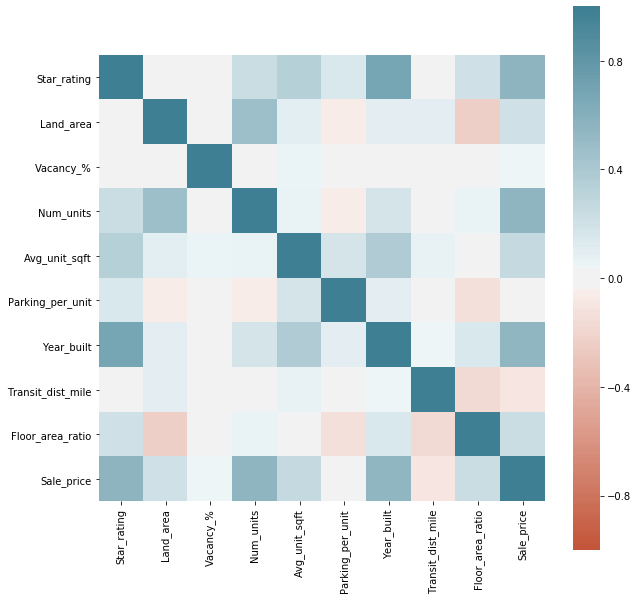

In [5]:
plt.figure(figsize = (10,10))

ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

plt.show()

In [20]:
fl = fl_reg_data.dropna()

In [7]:
fl.head()

,Star_rating,City,County,Land_area,Vacancy_%,Num_units,Avg_unit_sqft,Parking_per_unit,Year_built,Transit_dist_mile,Floor_area_ratio,Sale_price
3,4,Saint Petersburg,Pinellas,4.3464,0.0558,326,883.0,0.844,2014.0,13.98,2.920778,84500000.0
4,4,Saint Petersburg,Pinellas,4.3464,0.0558,326,883.0,0.844,2014.0,13.98,2.920778,10437600.0
5,3,Saint Petersburg,Pinellas,0.2748,0.0277,188,548.0,0.266,1971.0,13.74,10.911863,6800000.0
7,4,Saint Petersburg,Pinellas,2.8921,0.0589,358,989.0,0.908,2016.0,13.23,2.825765,126300000.0
11,4,Saint Petersburg,Pinellas,17.6711,0.0665,212,864.0,0.000,1986.0,5.52,0.536506,23500000.0


In [21]:
fl.shape

(260, 11)

In [25]:
Y = fl["Price_per_sqft"]
X = fl.drop(["Price_per_sqft","City","County","Star_rating","Vacancy_%","Avg_unit_sqft","Land_area"], axis = 1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Price_per_sqft   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     38.86
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           2.16e-25
Time:                        14:47:20   Log-Likelihood:                -1400.4
No. Observations:                 260   AIC:                             2811.
Df Residuals:                     255   BIC:                             2829.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3759.1171    417.511     -9.004      0.000   -4581.325   -2936.909
Num_studio            0.1685      0.088      1.913      0.057      -0.005       0.342
Parking_per_unit    -29.5893      5.403     -5.476      0.000     -40.230     -18.949
Year_built            1.9711      0.210      9.379      0.000       1.557       2.385
Transit_dist_mile    -1.3619      0.325     -4.197      0.000      -2.001      -0.723
==============================================================================
Omnibus:                       59.925   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.562
Skew:                           1.100   Prob(JB):                     3.66e-30
Kurtosis:                       5.770   Cond. No.                     2.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
dummies = pd.get_dummies(fl.County)

In [142]:
fl = fl.join(dummies)

In [151]:
Y = fl["NOI"]/1000000
X = fl.drop(["NOI","City","County","Land_area","Star_rating","Parking_per_unit"], axis = 1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

In [152]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOI   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     89.06
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:40:12   Log-Likelihood:                -2999.1
No. Observations:                2221   AIC:                             6066.
Df Residuals:                    2187   BIC:                             6260.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -66.2513      3.016    -21.969      0.000     -72.165     -60.338
Num_units             0.0058      0.000     36.136      0.000       0.005       0.006
Avg_unit_sqft         0.0006      0.000      4.945      0.000       0.000       0.001
Year_built            0.0342      0.002     21.453      0.000       0.031       0.037
Transit_dist_mile    -0.0015      0.003     -0.456      0.648      -0.008       0.005
Floor_area_ratio      0.1544      0.027      5.625      0.000       0.101       0.208
Alachua              -2.5489      0.201    -12.691      0.000      -2.943      -2.155
Bay                  -2.1517      0.283     -7.604      0.000      -2.707      -1.597
Brevard              -2.4779      0.167    -14.812      0.000      -2.806      -2.150
Broward              -1.8551      0.139    -13.345      0.000      -2.128      -1.582
Clay                 -2.3314      0.243     -9.579      0.000      -2.809      -1.854
Collier              -2.2584      0.261     -8.641      0.000      -2.771      -1.746
Duval                -2.5240      0.123    -20.480      0.000      -2.766      -2.282
Escambia             -2.5028      0.186    -13.454      0.000      -2.868      -2.138
Gadsden              -3.1532      0.921     -3.423      0.001      -4.960      -1.347
Hillsborough         -2.3650      0.130    -18.176      0.000      -2.620      -2.110
Lake                 -2.5515      0.659     -3.871      0.000      -3.844      -1.259
Lee                  -1.9535      0.224     -8.710      0.000      -2.393      -1.514
Leon                 -2.5588      0.155    -16.459      0.000      -2.864      -2.254
Manatee              -2.4443      0.168    -14.558      0.000      -2.774      -2.115
Miami/Dade           -1.9460      0.146    -13.361      0.000      -2.232      -1.660
Monroe               -0.6659      0.543     -1.226      0.220      -1.731       0.399
Nassau               -2.4797      0.470     -5.274      0.000      -3.402      -1.558
Okaloosa             -2.0234      0.302     -6.690      0.000      -2.617      -1.430
Orange               -2.5161      0.129    -19.508      0.000      -2.769      -2.263
Osceola              -2.4757      0.207    -11.952      0.000      -2.882      -2.070
Palm Beach           -2.0546      0.146    -14.040      0.000      -2.342      -1.768
Pasco                -2.5632      0.217    -11.833      0.000      -2.988      -2.138
Pinellas             -2.2388      0.134    -16.728      0.000      -2.501      -1.976
Polk                 -2.3216      0.543     -4.276      0.000      -3.386      -1.257
Santa Rosa           -2.6750      0.656     -4.080      0.000      -3.961      -1.389
Sarasota             -1.6005      0.221     -7.244      0.000      -2.034      -1.167
Seminole             -2.3548      0.157    -14.970      0.000      -2.663

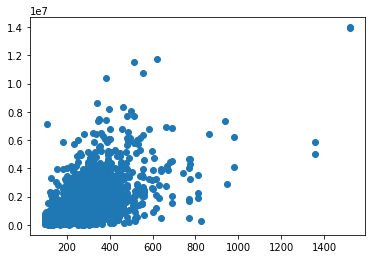

In [162]:
plt.figure()

plt.scatter(fl.Num_units, fl.NOI)


plt.show()

## Georgia

In [12]:
georgia = pd.read_csv("GA_NOI.csv", index_col = 0)

In [13]:
georgia.columns.unique()

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'SCAPN', 'SCSitus_NumNam_x', 'PropID',
       'Star_rating', 'City', 'State', 'Zip', 'County', 'For_sale_price',
       'For_sale_status', 'Land_area', 'Num_units', 'Cap_rate', 'Vacancy_%',
       'Avg_unit_sqft', 'Avg_Concession_%', 'Parking_per_unit', 'Days_on_mkt',
       'Amenities', 'Year_built', 'Year_reno', 'Last_sale_date',
       'Last_sale_price', 'Transit_dist_mile', 'Transit_walk_time_min',
       'Const_material', 'Num_studio', 'Studio_rent_sqft', 'Studio_avg_sqft',
       'Studio_concession_%', 'Studio_vacancy_%', 'Num_1_bed',
       '1_bed_rent_sqft', '1_bed_avg_sqft', '1_bed_concession_%',
       '1_bed_vacancy_%', 'Num_2_bed', '2_bed_rent_sqft', '2_bed_avg_sqft',
       '2_bed_concession_%', '2_bed_vacancy_%', 'Num_3_bed', '3_bed_rent_sqft',
       '3_bed_avg_sqft', '3_bed_concession_%', '3_bed_vacancy_%', 'Num_4_bed',
       '4_bed_rent_sqft', '4_bed_avg_sqft', '4_bed_concession_%',
       '4_bed_vacancy_%', '2010_Avg_age', '2019

In [14]:
## Pick out variables that we are interested in
ga_reg_data = georgia[["Star_rating", 
                       "City",
                       "County",
                       "Land_area",
                       "Vacancy_%",
                       "Num_units",
                       "Num_studio",
                       "Num_1_bed",
                       "Num_2_bed",
                       "Num_3_bed",
                       "Num_4_bed",
                       "Avg_unit_sqft",
                       "Parking_per_unit",
                      "Year_built",
                      "Transit_dist_mile",
                       "Transit_walk_time_min",
                      "Floor_area_ratio",
                      "Price_per_sqft"]]

In [15]:
corr = ga_reg_data.corr()

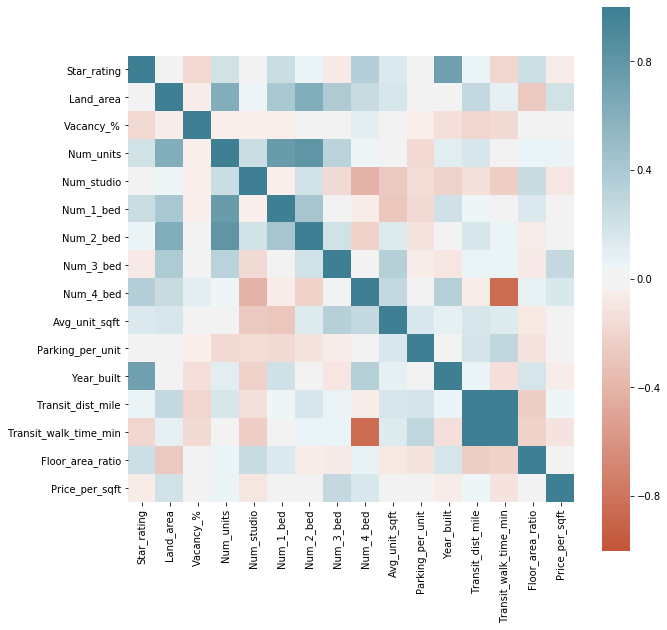

In [16]:
plt.figure(figsize = (10,10))

sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

plt.show()

In [76]:
ga = ga_reg_data.dropna()
ga.shape

(1369, 11)

In [81]:
Y = ga["NOI"]/1000000
X = ga.drop(["NOI","City","County","Star_rating","Parking_per_unit"], axis = 1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOI   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     211.5
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          1.00e-190
Time:                        11:53:20   Log-Likelihood:                -1610.8
No. Observations:                1369   AIC:                             3236.
Df Residuals:                    1362   BIC:                             3272.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -59.0085      2.988    -19.748      0.000     -64.870     -53.147
Land_area            -0.0098      0.002     -4.754      0.000      -0.014      -0.006
Num_units             0.0047      0.000     20.494      0.000       0.004       0.005
Avg_unit_sqft         0.0004      0.000      3.005      0.003       0.000       0.001
Year_built            0.0295      0.002     19.528      0.000       0.027       0.032
Transit_dist_mile     0.0002      0.002      0.084      0.933      -0.004       0.004
Floor_area_ratio      0.2163      0.033      6.513      0.000       0.151       0.281
==============================================================================
Omnibus:                      729.450   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16058.903
Skew:                           1.992   Prob(JB):                         0.00
Kurtosis:                      19.299   Cond. No.                     3.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
dummies = pd.get_dummies(ga.County)

In [154]:
ga = ga.join(dummies)

In [155]:
Y = ga["NOI"]/1000000
X = ga.drop(["NOI","City","County","Land_area","Star_rating","Parking_per_unit"], axis = 1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

In [156]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOI   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     43.05
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          1.49e-176
Time:                        12:45:00   Log-Likelihood:                -1587.7
No. Observations:                1369   AIC:                             3239.
Df Residuals:                    1337   BIC:                             3406.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -56.0851      3.096    -18.117      0.000     -62.158     -50.012
Num_units             0.0038      0.000     22.204      0.000       0.003       0.004
Avg_unit_sqft         0.0003      0.000      2.426      0.015    6.19e-05       0.001
Year_built            0.0291      0.002     17.987      0.000       0.026       0.032
Transit_dist_mile    -0.0048      0.003     -1.566      0.118      -0.011       0.001
Floor_area_ratio      0.2435      0.032      7.532      0.000       0.180       0.307
Bibb                 -2.0457      0.165    -12.412      0.000      -2.369      -1.722
Bryan                -2.0494      0.460     -4.453      0.000      -2.952      -1.147
Camden               -2.4103      0.549     -4.389      0.000      -3.488      -1.333
Carroll              -1.9952      0.557     -3.583      0.000      -3.088      -0.903
Chatham              -1.6127      0.182     -8.849      0.000      -1.970      -1.255
Clayton              -2.2155      0.146    -15.136      0.000      -2.503      -1.928
Cobb                 -1.7482      0.132    -13.219      0.000      -2.008      -1.489
Columbia             -1.9348      0.340     -5.687      0.000      -2.602      -1.267
Coweta               -1.7858      0.224     -7.972      0.000      -2.225      -1.346
DeKalb               -2.0233      0.125    -16.144      0.000      -2.269      -1.777
Dougherty            -2.3764      0.334     -7.118      0.000      -3.031      -1.721
Douglas              -1.9530      0.236     -8.287      0.000      -2.415      -1.491
Effingham            -1.9372      0.460     -4.207      0.000      -2.841      -1.034
Fayette              -2.3001      0.223    -10.332      0.000      -2.737      -1.863
Fulton               -1.7961      0.143    -12.586      0.000      -2.076      -1.516
Gwinnett             -1.9035      0.147    -12.943      0.000      -2.192      -1.615
Henry                -2.0761      0.208     -9.986      0.000      -2.484      -1.668
Houston              -2.1379      0.246     -8.677      0.000      -2.621      -1.655
Lowndes              -2.5711      0.290     -8.872      0.000      -3.140      -2.003
Muscogee             -2.3091      0.182    -12.719      0.000      -2.665      -1.953
Newton               -1.8784      0.553     -3.400      0.001      -2.962      -0.795
Peach                -2.6532      0.772     -3.437      0.001      -4.168      -1.139
Richmond             -1.9681      0.454     -4.338      0.000      -2.858      -1.078
Rockdale             -2.2979      0.223    -10.318      0.000      -2.735      -1.861
Spalding             -2.1648      0.282     -7.672      0.000      -2.718      -1.611
Walker               -1.9768      0.761     -2.597      0.010      -3.470      -0.484
Whitfield            -1.9645      0.544     -3.610      0.000      -3.032

## North Carolina

In [17]:
carolina = pd.read_csv("NC_NOI.csv", index_col = 0)

In [84]:
carolina.columns.unique()

Index(['Unnamed: 0_x', 'SCAPN', 'SCSitus_NumNam_x', 'PropID', 'Star_rating',
       'City', 'State', 'Zip', 'County', 'For_sale_price', 'For_sale_status',
       'Land_area', 'Num_units', 'Cap_rate', 'Vacancy_%', 'Avg_unit_sqft',
       'Avg_Concession_%', 'Parking_per_unit', 'Days_on_mkt', 'Amenities',
       'Year_built', 'Year_reno', 'Last_sale_date', 'Last_sale_price',
       'Transit_dist_mile', 'Transit_walk_time_min', 'Const_material',
       'Num_studio', 'Studio_rent_sqft', 'Studio_avg_sqft',
       'Studio_concession_%', 'Studio_vacancy_%', 'Num_1_bed',
       '1_bed_rent_sqft', '1_bed_avg_sqft', '1_bed_concession_%',
       '1_bed_vacancy_%', 'Num_2_bed', '2_bed_rent_sqft', '2_bed_avg_sqft',
       '2_bed_concession_%', '2_bed_vacancy_%', 'Num_3_bed', '3_bed_rent_sqft',
       '3_bed_avg_sqft', '3_bed_concession_%', '3_bed_vacancy_%', 'Num_4_bed',
       '4_bed_rent_sqft', '4_bed_avg_sqft', '4_bed_concession_%',
       '4_bed_vacancy_%', '2010_Avg_age', '2019_Avg_age', '2019

In [18]:
## Pick out variables that we are interested in
carolina_reg_data = carolina[["Star_rating", 
                       "City",
                       "County",
                       "Land_area",
                       "Vacancy_%",
                       "Num_units",
                       "Num_studio",
                       "Num_1_bed",
                       "Num_2_bed",
                       "Num_3_bed",
                       "Num_4_bed",
                       "Avg_unit_sqft",
                       "Parking_per_unit",
                      "Year_built",
                      "Transit_dist_mile",
                       "Transit_walk_time_min",
                      "Floor_area_ratio",
                      "Price_per_sqft"]]

In [19]:
corr = carolina_reg_data.corr()

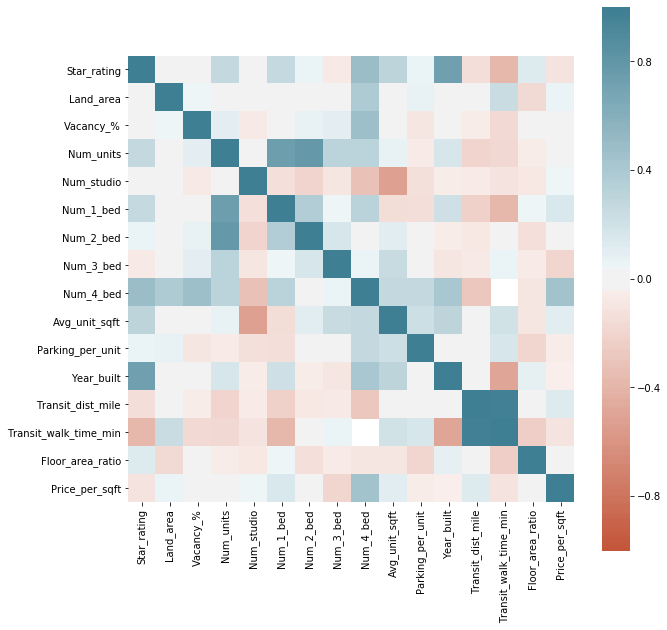

In [20]:
plt.figure(figsize = (10,10))

sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

plt.show()

In [87]:
nc = carolina_reg_data.dropna()
nc.shape

(996, 11)

In [88]:
Y = nc["NOI"]/1000000
X = nc.drop(["NOI","City","County","Star_rating","Parking_per_unit"], axis = 1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOI   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     348.5
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          5.94e-240
Time:                        11:55:52   Log-Likelihood:                -966.81
No. Observations:                 996   AIC:                             1948.
Df Residuals:                     989   BIC:                             1982.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -60.9118      2.743    -22.204      0.000     -66.295     -55.529
Land_area             0.0207      0.001     20.922      0.000       0.019       0.023
Num_units             0.0034      0.000     15.002      0.000       0.003       0.004
Avg_unit_sqft         0.0004      0.000      2.783      0.005       0.000       0.001
Year_built            0.0305      0.001     21.780      0.000       0.028       0.033
Transit_dist_mile    -0.0159      0.003     -5.724      0.000      -0.021      -0.010
Floor_area_ratio      0.4640      0.034     13.534      0.000       0.397       0.531
==============================================================================
Omnibus:                      199.737   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.905
Skew:                           0.908   Prob(JB):                    5.39e-169
Kurtosis:                       6.921   Cond. No.                     3.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
dummies = pd.get_dummies(nc.County)

In [158]:
nc = nc.join(dummies)

In [159]:
Y = nc.NOI/1000000
X = nc.drop(["NOI","City","County","Star_rating","Parking_per_unit"], axis = 1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

In [160]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOI   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     70.08
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          1.60e-222
Time:                        13:04:06   Log-Likelihood:                -945.03
No. Observations:                 996   AIC:                             1954.
Df Residuals:                     964   BIC:                             2111.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -58.8807      2.735    -21.530      0.000     -64.247     -53.514
Land_area             0.0204      0.001     20.343      0.000       0.018       0.022
Num_units             0.0034      0.000     14.828      0.000       0.003       0.004
Avg_unit_sqft         0.0004      0.000      3.112      0.002       0.000       0.001
Year_built            0.0304      0.001     21.094      0.000       0.028       0.033
Transit_dist_mile    -0.0138      0.004     -3.282      0.001      -0.022      -0.006
Floor_area_ratio      0.4635      0.034     13.508      0.000       0.396       0.531
Alamance             -2.1467      0.213    -10.062      0.000      -2.565      -1.728
Brunswick            -2.4900      0.458     -5.440      0.000      -3.388      -1.592
Buncombe             -1.9100      0.173    -11.067      0.000      -2.249      -1.571
Cabarrus             -1.9689      0.208     -9.456      0.000      -2.377      -1.560
Carteret             -2.7184      0.628     -4.328      0.000      -3.951      -1.486
Craven               -2.0278      0.622     -3.258      0.001      -3.249      -0.806
Cumberland           -2.6110      0.212    -12.318      0.000      -3.027      -2.195
Davidson             -2.6658      0.280     -9.527      0.000      -3.215      -2.117
Durham               -1.9559      0.136    -14.432      0.000      -2.222      -1.690
Forsyth              -2.0195      0.138    -14.621      0.000      -2.291      -1.748
Gaston               -2.1392      0.167    -12.796      0.000      -2.467      -1.811
Guilford             -2.3039      0.259     -8.904      0.000      -2.812      -1.796
Henderson            -3.1380      0.629     -4.991      0.000      -4.372      -1.904
Hoke                 -2.3367      0.629     -3.716      0.000      -3.571      -1.103
Iredell              -1.9046      0.218     -8.729      0.000      -2.333      -1.476
Lincoln              -2.5026      0.379     -6.606      0.000      -3.246      -1.759
Mecklenburg          -2.0410      0.129    -15.876      0.000      -2.293      -1.789
New Hanover          -1.8945      0.187    -10.131      0.000      -2.262      -1.528
Onslow               -2.3598      0.298     -7.911      0.000      -2.945      -1.774
Orange               -1.8988      0.160    -11.843      0.000      -2.213      -1.584
Pitt                 -2.1482      0.244     -8.795      0.000      -2.627      -1.669
Randolph             -2.1554      0.276     -7.821      0.000      -2.696      -1.615
Robeson              -2.2198      0.632     -3.511      0.000      -3.460      -0.979
Rockingham           -3.6669      0.627     -5.852      0.000      -4.897      -2.437
Union                -1.6856      0.380     -4.432      0.000      -2.432      -0.939
Wake                 -1.9715      0.132    -14.923      0.000      -2.231

## Texas

In [21]:
texas = pd.read_csv("TX_NOI.csv", index_col = 0)

In [234]:
# = texas.drop_duplicates(subset="SCAPN", keep="first", inplace=False)

In [244]:
texas.head()

,index,Unnamed: 0.1,Unnamed: 0_x,SCAPN,SCSitus_NumNam_x,PropID,Star_rating,City,State,Zip,...,Assessed_yr,Floor_area_ratio,Num_floors,Price_per_sqft,Land_price_per_AC,Sale_date,Sale_price,Price,Concession_value,NOI
0,0,1,1,TX Bexar 00273-002-0011,TX Bexar939 Frio St,P10570,4,San Antonio,TX,78207,...,2016.0,0.853417,5.0,175.0,6505576.21,1970-01-01 00:00:00.000042719,17500000.0,17500000.0,105000.000,892926.393270
1,1,4,4,TX Travis 04120906540000,TX Travis5112 1st St,P10573,3,Austin,TX,787452293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,60000.000,467114.698218
2,2,5,5,TX Brown 55022,TX Brown2801 4th St,P10574,3,Brownwood,TX,768016161,...,2014.0,0.306697,2.0,NaN,NaN,1970-01-01 00:00:00.000042048,NaN,1644010.0,6576.040,115386.377347
3,3,6,6,TX Lubbock R94203,TX Lubbock5525 4th St,P10575,2,Lubbock,TX,794164230,...,2015.0,0.339285,1.0,NaN,NaN,1970-01-01 00:00:00.000042250,NaN,2240725.0,15685.075,134619.352154
4,4,7,6,TX Lubbock R94203,TX Lubbock5525 4th St,P10575,2,Lubbock,TX,794164230,...,2011.0,0.339285,1.0,NaN,NaN,1970-01-01 00:00:00.000040997,NaN,2106883.0,14748.181,124489.406682


In [23]:
## Pick out variables that we are interested in
texas_reg_data = texas[["Star_rating", 
                       "City",
                       "County",
                       "Land_area",
                       "Vacancy_%",
                       "Num_units",
                       "Num_studio",
                       "Num_1_bed",
                       "Num_2_bed",
                       "Num_3_bed",
                       "Num_4_bed",
                       "Avg_unit_sqft",
                       "Parking_per_unit",
                      "Year_built",
                      "Transit_dist_mile",
                       "Transit_walk_time_min",
                      "Floor_area_ratio",
                      "Price_per_sqft"]]

In [24]:
corr = texas_reg_data.corr()

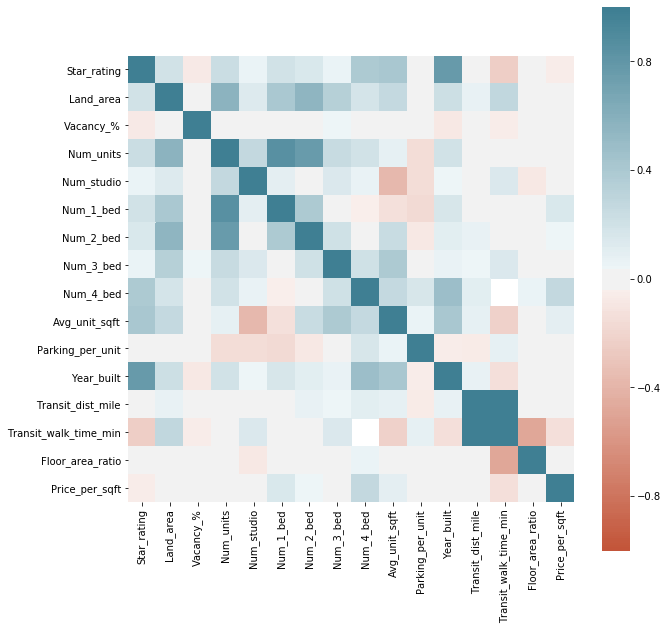

In [25]:
plt.figure(figsize = (10,10))

sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

plt.show()

In [248]:
tx = texas_reg_data.dropna()
tx.shape

(3499, 11)

In [249]:
tx.head()

,Star_rating,City,County,Land_area,Num_units,Avg_unit_sqft,Parking_per_unit,Year_built,Transit_dist_mile,Floor_area_ratio,NOI
0,4,San Antonio,Bexar,2.690,102,917.0,2.431,2014.0,9.30,0.853417,892926.393270
3,2,Lubbock,Lubbock,5.340,104,818.0,1.923,1976.0,15.40,0.339285,134619.352154
4,2,Lubbock,Lubbock,5.340,104,818.0,1.923,1976.0,15.40,0.339285,124489.406682
6,2,Lubbock,Lubbock,3.416,103,962.0,3.689,1963.0,14.44,0.605309,311554.440811
7,2,Lubbock,Lubbock,3.416,103,962.0,3.689,1963.0,14.44,0.605309,353823.663550


In [252]:
Y = tx["NOI"]/1000000
X = tx.drop(["NOI","City","County","Star_rating","Parking_per_unit","Land_area"], axis = 1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

In [253]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOI   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     774.2
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:59:57   Log-Likelihood:                -4430.8
No. Observations:                3499   AIC:                             8874.
Df Residuals:                    3493   BIC:                             8910.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -64.6697      2.317    -27.917      0.000     -69.212     -60.128
Num_units             0.0047      0.000     40.967      0.000       0.005       0.005
Avg_unit_sqft         0.0013      0.000     11.846      0.000       0.001       0.002
Year_built            0.0320      0.001     26.983      0.000       0.030       0.034
Transit_dist_mile    -0.0122      0.002     -7.409      0.000      -0.015      -0.009
Floor_area_ratio      0.0002      0.001      0.457      0.648      -0.001       0.001
==============================================================================
Omnibus:                     1722.727   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38201.798
Skew:                           1.838   Prob(JB):                         0.00
Kurtosis:                      18.765   Cond. No.                     3.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
dummies = pd.get_dummies(tx.County)

In [255]:
tx = tx.join(dummies)

In [257]:
Y = tx["NOI"]/1000000
X = tx.drop(["NOI","City","County","Star_rating","Parking_per_unit","Land_area"], axis = 1)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

In [258]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOI   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     86.42
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:01:31   Log-Likelihood:                -4374.6
No. Observations:                3499   AIC:                             8845.
Df Residuals:                    3451   BIC:                             9141.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -61.2010      2.387    -25.636      0.000     -65.882     -56.520
Num_units             0.0046      0.000     39.303      0.000       0.004       0.005
Avg_unit_sqft         0.0012      0.000     11.247      0.000       0.001       0.001
Year_built            0.0311      0.001     24.907      0.000       0.029       0.034
Transit_dist_mile    -0.0160      0.002     -6.919      0.000      -0.020      -0.011
Floor_area_ratio      0.0002      0.001      0.330      0.741      -0.001       0.001
Bell                 -1.4788      0.153     -9.694      0.000      -1.778      -1.180
Bexar                -1.4086      0.090    -15.687      0.000      -1.585      -1.233
Bowie                -2.2078      0.836     -2.641      0.008      -3.847      -0.569
Brazoria             -1.5198      0.164     -9.268      0.000      -1.841      -1.198
Brazos               -1.3028      0.171     -7.626      0.000      -1.638      -0.968
Cameron              -2.2103      0.245     -9.005      0.000      -2.692      -1.729
Chambers             -1.3759      0.834     -1.649      0.099      -3.012       0.260
Collin               -1.0065      0.097    -10.379      0.000      -1.197      -0.816
Comal                -1.0732      0.308     -3.489      0.000      -1.676      -0.470
Dallas               -1.4047      0.081    -17.240      0.000      -1.564      -1.245
Denton               -1.3414      0.098    -13.626      0.000      -1.534      -1.148
Ector                -1.2246      0.348     -3.521      0.000      -1.907      -0.543
El Paso              -1.5840      0.155    -10.211      0.000      -1.888      -1.280
Ellis                -1.2425      0.354     -3.512      0.000      -1.936      -0.549
Fort Bend            -1.3033      0.146     -8.956      0.000      -1.589      -1.018
Galveston            -1.5983      0.159    -10.039      0.000      -1.910      -1.286
Gregg                -1.2110      0.304     -3.989      0.000      -1.806      -0.616
Guadalupe            -1.2477      0.350     -3.568      0.000      -1.933      -0.562
Hardin               -1.0086      0.836     -1.207      0.228      -2.647       0.630
Harris               -1.4522      0.083    -17.409      0.000      -1.616      -1.289
Hays                 -1.2480      0.167     -7.453      0.000      -1.576      -0.920
Henderson            -1.1893      0.836     -1.422      0.155      -2.829       0.450
Hidalgo              -2.0134      0.265     -7.592      0.000      -2.533      -1.493
Jefferson            -1.4798      0.155     -9.521      0.000      -1.785      -1.175
Johnson              -1.7159      0.492     -3.486      0.000      -2.681      -0.751
Kendall              -1.6409      0.428     -3.837      0.000      -2.479      -0.802
Lubbock              -1.3974      0.140     -9.991      0.000      -1.672